Samuel Castro SPOTIFY PROJECT 
DSC 680-T302
09/24/23

In [103]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [2]:
# Load the data from txt file
df = pd.read_csv('Desktop/DSC 680/spotify-2023.csv', encoding='latin-1')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
# I am going to drop the following columns to base my analysis on spotify and apple streams only 
# List of columns to drop
columns_to_drop = [
    "in_deezer_playlists",
    "in_deezer_charts",
    "in_shazam_charts"
]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
df["key_encoded"] = label_encoder.fit_transform(df["key"])
df["mode_encoded"] = label_encoder.fit_transform(df["mode"])

# Drop the original categorical columns
df.drop(["key", "mode"], axis=1, inplace=True)

In [7]:
print(df.iloc[601])

track_name                                       Vai Lï¿½ï¿½ Em Casa 
artist(s)_name          Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &
artist_count                                                        2
released_year                                                    2021
released_month                                                     10
released_day                                                       22
in_spotify_playlists                                              772
in_spotify_charts                                                   0
streams                                                     263894529
in_apple_playlists                                                  7
in_apple_charts                                                     3
bpm                                                               158
danceability_%                                                     46
valence_%                                                          62
energy_%            

In [8]:
import re

# Define a function to remove unwanted special characters from a string
def remove_special_characters(text):
    if isinstance(text, str):
        # Define a regular expression pattern to remove unwanted special characters
        # Include the specific special characters you want to remove
        pattern = r'[½ï½ï½¿¿¿]'  # This pattern removes the specified symbols

        # Use re.sub() to remove the unwanted special characters
        return re.sub(pattern, '', text)
    else:
        return text

# Apply the function to every cell in the DataFrame
df_cleaned = df.applymap(remove_special_characters)

In [9]:
print(df_cleaned.iloc[601])

track_name                                 Vai L Em Casa 
artist(s)_name          Marlia Mendona, George Henrique &
artist_count                                            2
released_year                                        2021
released_month                                         10
released_day                                           22
in_spotify_playlists                                  772
in_spotify_charts                                       0
streams                                         263894529
in_apple_playlists                                      7
in_apple_charts                                         3
bpm                                                   158
danceability_%                                         46
valence_%                                              62
energy_%                                               83
acousticness_%                                         53
instrumentalness_%                                      0
liveness_%    

In [10]:
print(df_cleaned.iloc[574])

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
bpm                                                                   110
danceability_%                                                         53
valence_%                             

In [11]:
df_cleaned = df_cleaned.drop(574)

In [12]:
print(df_cleaned.iloc[574])

track_name              LA FAMA (with The Weeknd)
artist(s)_name                  The Weeknd, ROSAL
artist_count                                    2
released_year                                2021
released_month                                 11
released_day                                   11
in_spotify_playlists                         4640
in_spotify_charts                               3
streams                                 374706940
in_apple_playlists                             81
in_apple_charts                                93
bpm                                           136
danceability_%                                 77
valence_%                                      82
energy_%                                       30
acousticness_%                                 95
instrumentalness_%                              0
liveness_%                                     13
speechiness_%                                   5
key_encoded                                    11


In [13]:
# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df_cleaned.head())
# The missing values from key turned into zeros when I encoded them 


Updated DataFrame:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  danceability_%  \
0                147 

Summary Statistics:
       artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000 

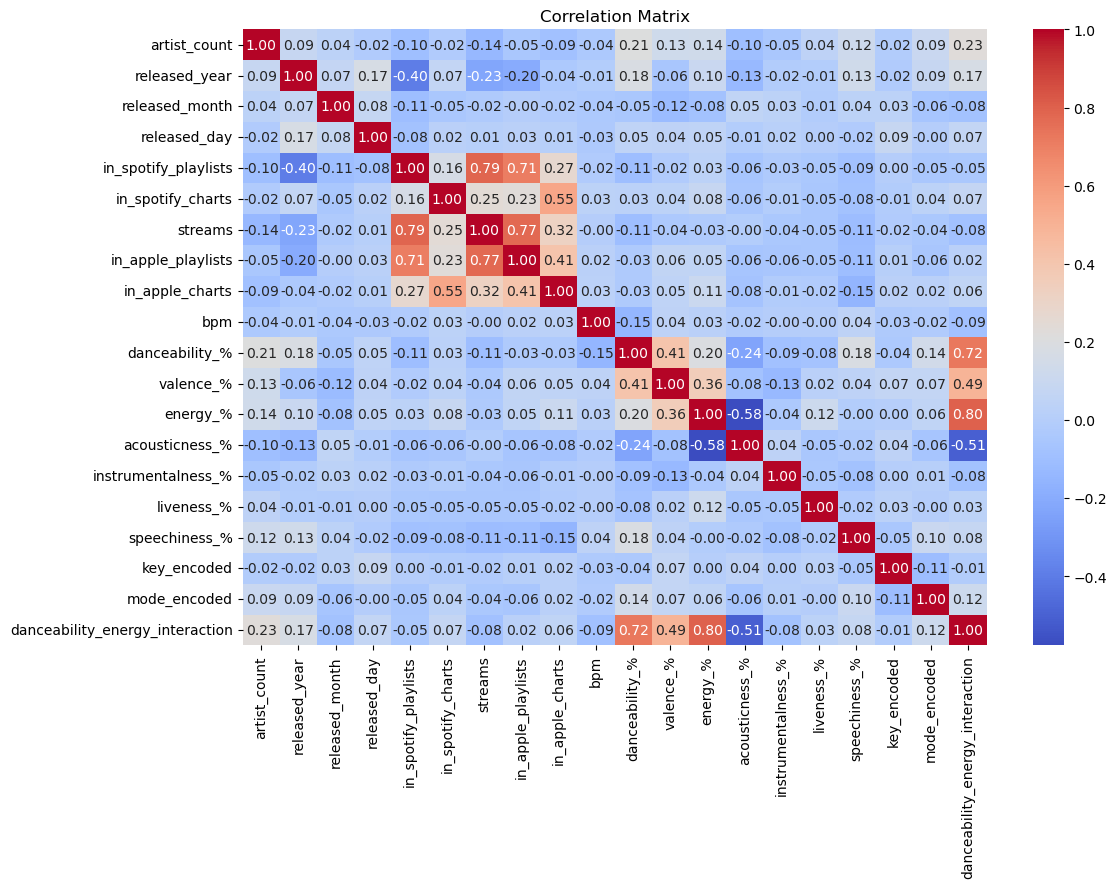

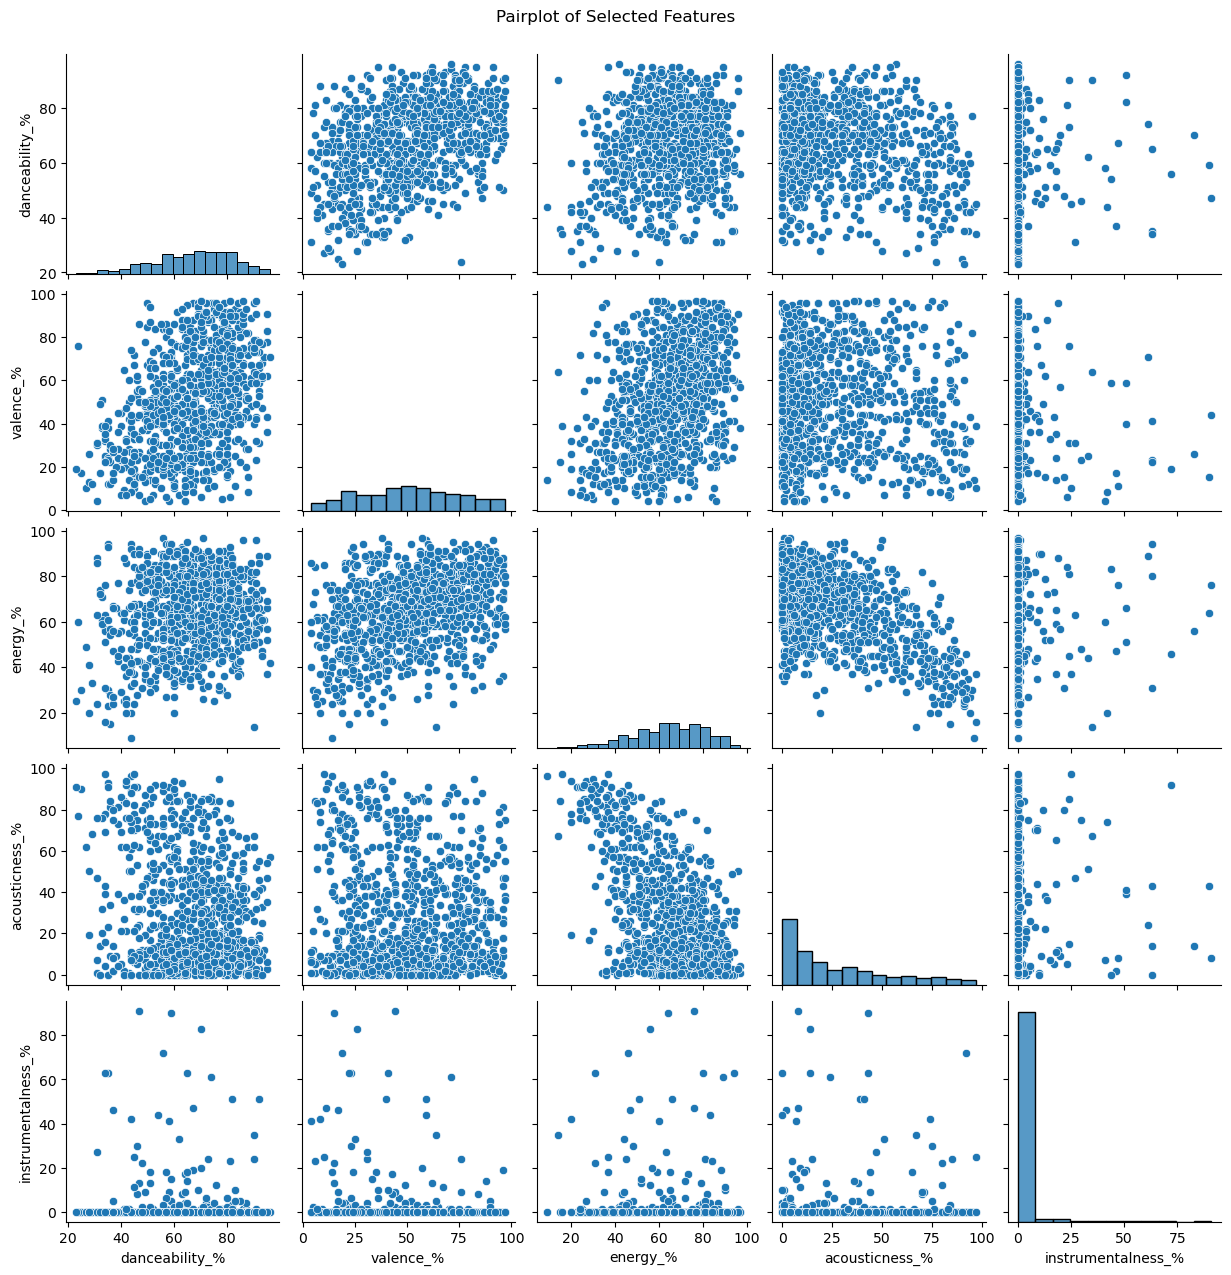

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of numerical columns
summary_stats = df_cleaned.describe()
print("Summary Statistics:")
print(summary_stats)


# Correlation matrix
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplot for selected features
selected_features = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%"]
sns.pairplot(df_cleaned[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

Summary Statistics:
       artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000 

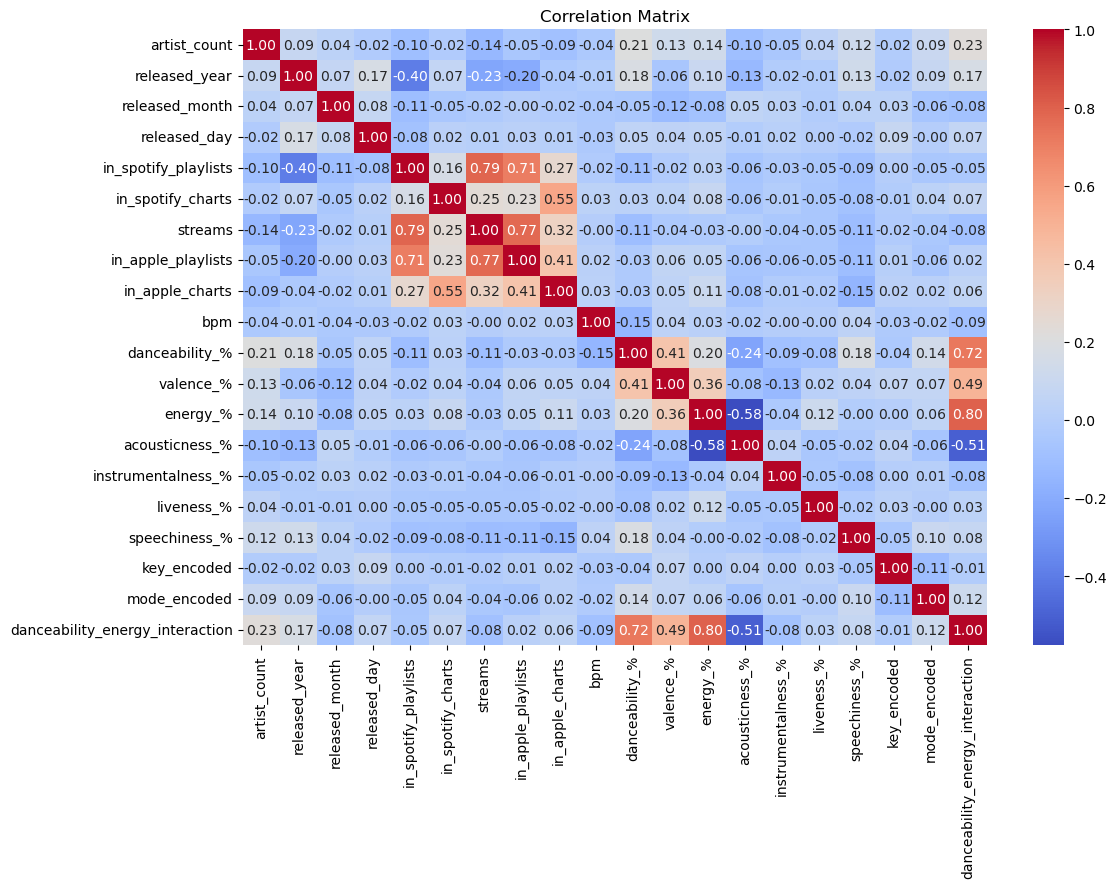

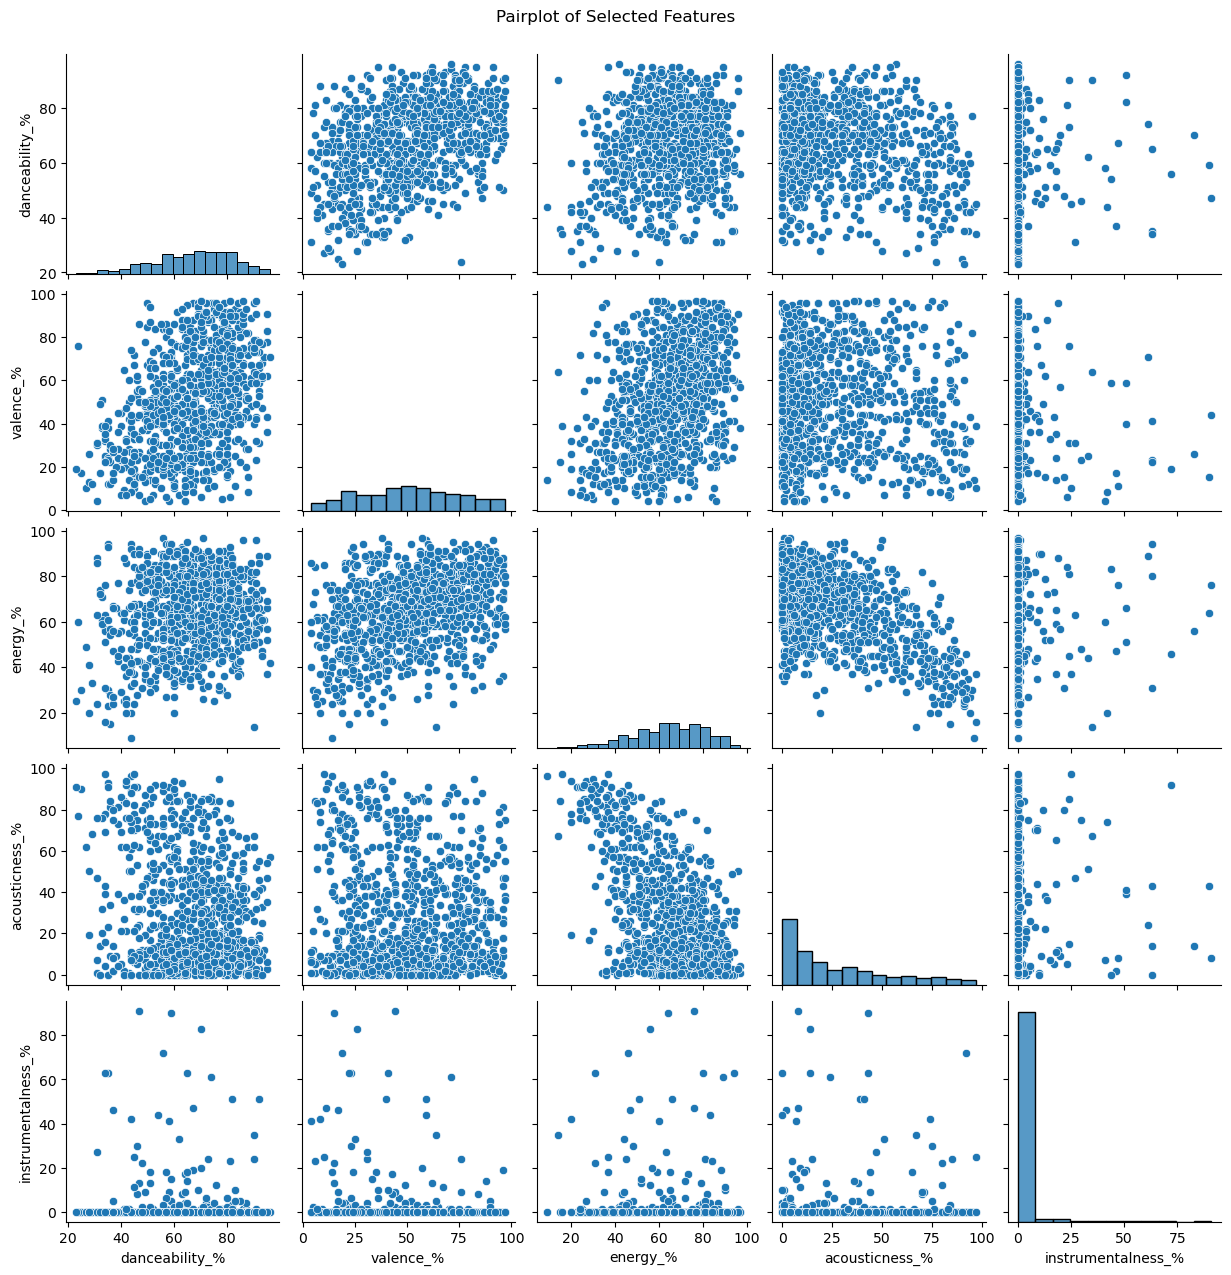

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of numerical columns
summary_stats = df_cleaned.describe()
print("Summary Statistics:")
print(summary_stats)


# Correlation matrix
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplot for selected features
selected_features = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%"]
sns.pairplot(df_cleaned[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [34]:
# Specify the numeric columns 
numeric_columns_to_keep = [
    "artist_count",
    "in_spotify_playlists",
    "in_spotify_charts",
    "streams",
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%",
    "key_encoded",
    "mode_encoded"
]

df_cleaned[numeric_columns_to_keep] = df_cleaned[numeric_columns_to_keep].astype(int)

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Create a new DataFrame with only the specified numeric columns
numeric_df = df_cleaned[numeric_columns_to_keep]

# Separate the features (X) and the target variable (y)
X = numeric_df.drop("streams", axis=1)
y = numeric_df["streams"]

# Perform feature selection using SelectKBest and f_regression
num_features_to_select = 10  # You can adjust this based on your analysis
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['artist_count', 'in_spotify_playlists', 'in_spotify_charts',
       'danceability_%', 'valence_%', 'energy_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'mode_encoded'],
      dtype='object')


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=64)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression Results:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Linear Regression Results:
Mean Absolute Error (MAE): 217886434.90214863
Mean Squared Error (MSE): 1.0752199104685928e+17
Root Mean Squared Error (RMSE): 327905460.5322383
R-squared (R2): 0.6566867815625121


In [88]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=70)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Regressor Results:")
print("Random Forest - Mean Absolute Error (MAE):", rf_mae)
print("Random Forest - Mean Squared Error (MSE):", rf_mse)
print("Random Forest - Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest - R-squared (R2):", rf_r2)

Random Forest Regressor Results:
Random Forest - Mean Absolute Error (MAE): 192338798.6190026
Random Forest - Mean Squared Error (MSE): 8.841758866701541e+16
Random Forest - Root Mean Squared Error (RMSE): 297350952.019689
Random Forest - R-squared (R2): 0.717686338987845


In [80]:
# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Ensure that feature_importances has the same number of elements as the number of features
# In this case, there should be 13 elements in feature_importances
if len(feature_importances) != X_train.shape[1]:
    print("Number of feature importances does not match the number of features.")
else:
    print("Number of feature importances matches the number of features.")

Number of feature importances matches the number of features.


In [81]:
# Print the dimensions of X_train
print("Dimensions of X_train:", X_train.shape)

# Print the dimensions of y_train
print("Dimensions of y_train:", y_train.shape)

# Print the dimensions of the feature_importances array
print("Dimensions of feature_importances:", feature_importances.shape)

Dimensions of X_train: (571, 13)
Dimensions of y_train: (571,)
Dimensions of feature_importances: (13,)


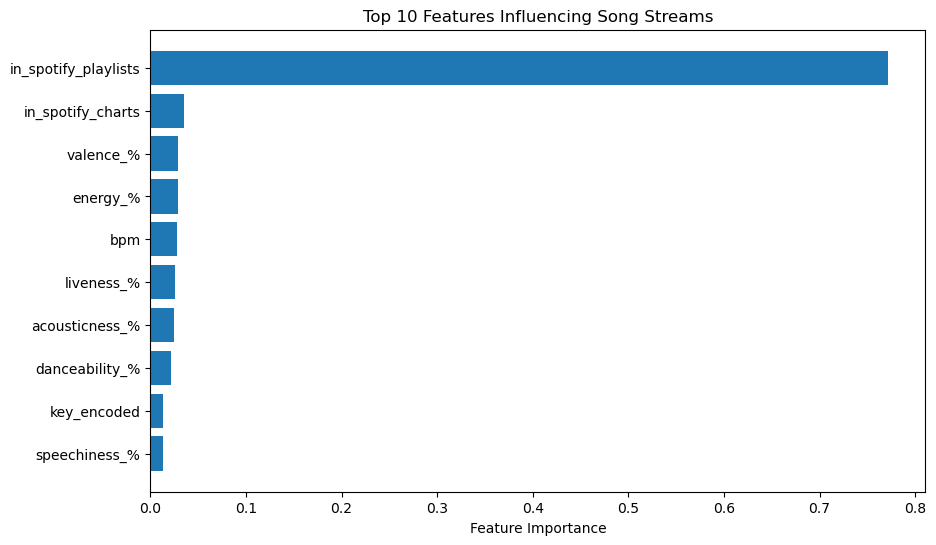

In [83]:
# Retrieve feature names from X_train
feature_names = X_train.columns

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # You can adjust this to show more or fewer features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top {} Features Influencing Song Streams'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [99]:
new_song_features = [
    125,             # BPM
    0.2,             # Acousticness (%)
    0.0,             # Instrumentalness (%)
    8,               # Liveness (%)
    15,              # Speechiness (%)
    89,              # Valence (%)
    83,              # Energy (%)
    2023,            # Released year
    7,               # Released month
    14,              # Released day
    553,             # In Spotify playlists
    147,             # In Spotify charts
    141381703,       # Streams
]

In [104]:
predicted_streams = rf_model.predict([new_song_features])

# The 'predicted_streams' variable now contains the predicted number of streams for the new song.
predicted_streams

array([4.52186511e+08])

In [19]:
import pandas as pd

# You can prioritize songs with higher valence and energy for recommendations
recommended_songs = df_cleaned.sort_values(by=["valence_%", "energy_%"], ascending=[False, False])

# Select the top N recommended songs
top_n_recommendations = 10  # You can adjust this based on your recommendation goals
recommended_songs = recommended_songs.head(top_n_recommendations)

# Display the recommended songs
print("Top Recommended Songs:")
print(recommended_songs[["track_name", "artist(s)_name", "valence_%", "energy_%"]])

Top Recommended Songs:
                          track_name                 artist(s)_name  \
754  There's Nothing Holdin' Me Back                   Shawn Mendes   
359                   Zona De Perigo                    Leo Santana   
861         En El Radio Un Cochinero                 Victor Cibrian   
896                              JGL  Luis R Conriquez, La Adictiva   
418                             Doja                    Central Cee   
53      (It Goes Like) Nanana - Edit                      Peggy Gou   
25                       SABOR FRESA                  Fuerza Regida   
39                               TQM                  Fuerza Regida   
451                    Feliz Navidad                      Jos Felic   
149           El Gordo Trae El Mando                    Chino Pacas   

     valence_%  energy_%  
754         97        80  
359         97        77  
861         97        62  
896         97        59  
418         97        57  
53          96        88  
25    